In [2]:
import torch
import torch.nn as nn
from src.agent_logic import Agent
from src.game_logic import Game
import pandas
from matplotlib import pyplot as plt

In [3]:
def play_game(game, agent):
    while not game.game_over():
        # Calculate q value for each action from state
        state_values = agent._model(game.state.flatten(1).float())
        # Flag futile actions
        state_values[game.available_actions().logical_not()] = -1
        # Choose action with max q_value
        actions = state_values.max(1)[1]
        # Do Action
        game.do_action(actions.to(torch.int8), 1)

## Init Random Agent

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [6]:
model = nn.Sequential(
    nn.Linear(16, 16),
    nn.Hardsigmoid(),
    nn.Linear(16, 16),
    nn.Hardsigmoid(),
    nn.Linear(16, 8),
    nn.Hardsigmoid(),
    nn.Linear(8, 4),
    nn.Hardsigmoid(),
)

In [7]:
agent = Agent(device, model)

## Play Game with Random AgentWeights

In [8]:
game = Game(5, 4)

In [9]:
play_game(game, agent)

In [10]:
game.state

tensor([[[4, 3, 4, 1],
         [3, 4, 2, 4],
         [2, 3, 1, 2],
         [1, 2, 3, 1]],

        [[4, 3, 1, 2],
         [3, 1, 2, 4],
         [1, 3, 5, 2],
         [2, 1, 3, 1]],

        [[1, 6, 2, 1],
         [3, 4, 5, 3],
         [2, 3, 4, 6],
         [1, 2, 3, 1]],

        [[1, 2, 3, 4],
         [3, 4, 5, 6],
         [2, 3, 4, 5],
         [1, 2, 3, 4]],

        [[1, 4, 1, 3],
         [3, 5, 6, 5],
         [2, 1, 5, 1],
         [1, 2, 3, 4]]], device='cuda:0', dtype=torch.uint8)

In [11]:
game.score

tensor([244, 284, 900, 808, 788], device='cuda:0', dtype=torch.int32)

## Load Trained Agent

In [12]:
model.load_state_dict(torch.load('models/model1.pt'))

<All keys matched successfully>

## Play Game with Trained Agent

In [13]:
game = Game(5, 4)

In [14]:
play_game(game, agent)

In [15]:
game.state

tensor([[[1, 2, 3, 4],
         [2, 3, 4, 5],
         [3, 4, 5, 6],
         [1, 5, 7, 3]],

        [[2, 1, 2, 3],
         [1, 2, 3, 4],
         [2, 4, 2, 6],
         [1, 5, 3, 7]],

        [[1, 2, 1, 4],
         [2, 1, 3, 5],
         [5, 3, 5, 7],
         [1, 4, 7, 8]],

        [[1, 2, 3, 4],
         [2, 3, 4, 5],
         [3, 4, 5, 6],
         [5, 2, 4, 8]],

        [[1, 2, 3, 4],
         [4, 3, 4, 6],
         [2, 6, 1, 7],
         [1, 4, 5, 8]]], device='cuda:0', dtype=torch.uint8)

In [16]:
game.score

tensor([1636, 1312, 3760, 2672, 3428], device='cuda:0', dtype=torch.int32)

## Load Training Record

In [18]:
training = pandas.read_csv('records/trial1.csv')

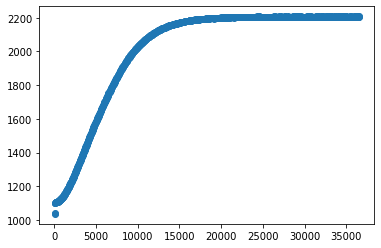

In [21]:
plt.scatter(training['Time (s)'], training['Mean'])
plt.show()